In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deeplearning/Traffic.csv")

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
df.nunique()

Time                  96
Date                  31
Day of the week        7
CarCount             172
BikeCount             71
BusCount              51
TruckCount            41
Total                239
Traffic Situation      4
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for name in df.columns:
    df[name] = le.fit_transform(df[name])
    df[name].fillna(int(df[name].median()), inplace=True)

In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,9,5,25,0,4,4,18,2
1,18,9,5,43,0,3,3,34,2
2,20,9,5,40,0,3,6,34,2
3,22,9,5,45,0,2,5,37,2
4,24,9,5,51,6,15,16,73,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Time               2976 non-null   int64
 1   Date               2976 non-null   int64
 2   Day of the week    2976 non-null   int64
 3   CarCount           2976 non-null   int64
 4   BikeCount          2976 non-null   int64
 5   BusCount           2976 non-null   int64
 6   TruckCount         2976 non-null   int64
 7   Total              2976 non-null   int64
 8   Traffic Situation  2976 non-null   int64
dtypes: int64(9)
memory usage: 209.4 KB


In [ ]:
target = df.pop('Traffic Situation')
features = df


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
features = mm.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split


x,x_test,y,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)

features.shape

(2976, 8)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
activation ='relu'
model.add(keras.layers.Flatten(input_shape=[8]))
model.add(keras.layers.Dense(400,activation=activation))
model.add(keras.layers.Dense(200,activation=activation))
model.add(keras.layers.Dense(100,activation=activation))
model.add(keras.layers.Dense(50,activation=activation))
model.add(keras.layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 400)               3600      
                                                                 
 dense_6 (Dense)             (None, 200)               80200     
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 4)                 204       
                                                                 
Total params: 109154 (426.38 KB)
Trainable params: 109

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=20 )

Epoch 1/20
60/60 [==============================] - 2s 14ms/step - loss: 0.8157 - accuracy: 0.6880 - val_loss: 0.5313 - val_accuracy: 0.8025
Epoch 2/20
60/60 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7983 - val_loss: 0.4116 - val_accuracy: 0.8529
Epoch 3/20
60/60 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8613 - val_loss: 0.3378 - val_accuracy: 0.8613
Epoch 4/20
60/60 [==============================] - 0s 5ms/step - loss: 0.2953 - accuracy: 0.8913 - val_loss: 0.3258 - val_accuracy: 0.8845
Epoch 5/20
60/60 [==============================] - 0s 5ms/step - loss: 0.2558 - accuracy: 0.9049 - val_loss: 0.2648 - val_accuracy: 0.9055
Epoch 6/20
60/60 [==============================] - 0s 5ms/step - loss: 0.2210 - accuracy: 0.9107 - val_loss: 0.2533 - val_accuracy: 0.9202
Epoch 7/20
60/60 [==============================] - 0s 5ms/step - loss: 0.1990 - accuracy: 0.9228 - val_loss: 0.2790 - val_accuracy: 0.8929
Epoch 8/20
60/60 [=

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

19/19 [==============================] - 0s 2ms/step


Accuracy: 0.9513422818791947
precision: 0.9513422818791947
recall: 0.9513422818791947


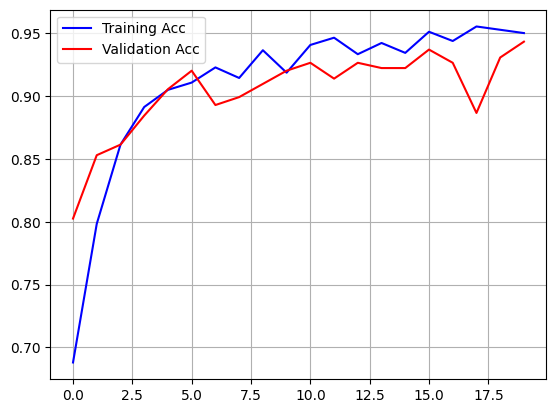

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.grid()
plt.legend(['Training Acc','Validation Acc'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred , average='micro')

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")